## Abstract

The task is to perform data cleaning on the given heart.csv dataset.The dataset is procured from the [UCI Heart disease dataset](https://www.kaggle.com/ronitf/heart-disease-uci). The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 1. In the process following aspects of the data are checked - 

- Identifying Outliers and removing if any
- Imputing missing values ie., look at multiple methods for imputing categorical, numeric, and time-series data
- Adjusts for bias in the dataset
- Compare and contrast metrics to observe what changed from Original to changed dataset
- Visualize the metrics to observe what changed from Original to changed dataset


In order to perform the task, first the EDA (using seaborn/matplotlib) was done to get a sense of the data. Later on various techniques of data cleaning are applied to the dataset and/or suggested for any other type of dataset as well(say dataset had time-series).


```
Acknowledgements

Creators:

    Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
    University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
    University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
    V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor:
David W. Aha (aha '@' ics.uci.edu) (714) 856-8779 
```

### 1.1 Importing necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
from numpy import unique
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from fitter import Fitter, get_common_distributions, get_distributions
from matplotlib import pyplot

### 1.2 Loading the dataset

In [2]:
dataset = pd.read_csv('/home/zutshi.k/squark/heart.csv')
data_df = pd.DataFrame(dataset)

### 2. Summarizing the dataset

In this step we are going to take a look at the data a few different ways:

    1. Dimensions of the dataset.
    2. Peek at the data itself.
    3. Statistical summary of all attributes.


#### 2.1 Dimentions of the dataset

As we can see the dataset has 303 instances and 14 attributes(including the Target dependent variable)

In [3]:
data_df.shape

(303, 14)

#### 2.2 Peak at the dataset sample

In [4]:
# look at a sample of rows from the dataframe
data_df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
115,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2,1


#### 2.3 Statistical and info summary of the dataset

#### Dataset Description

**age**

**sex** - (1 = male; 0 = female)

**cp** - chest pain type (4 values)

**trestbps** - resting blood pressure

**chol** - serum cholestoral in mg/dl

**fbs** - fasting blood sugar > 120 mg/dl (1 = true; 0 = false) 

**restecg** - resting electrocardiographic results (values 0,1,2)

**thalach** - maximum heart rate achieved

**exang** -exercise induced angina (1 = yes; 0 = no) | Stable angina is usually triggered by physical activity. When you climb stairs, exercise or walk, your heart demands more blood, but narrowed arteries slow down blood flow.

**oldpeak** -  ST depression induced by exercise relative to rest

**slope** - the slope of the peak exercise ST segment

**ca** - number of major vessels (0-3) colored by flourosopy

**thal** - 3 = normal; 6 = fixed defect; 7 = reversable defect

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In this dataset, we have **categorical variables** that have been label encoded already such as - **sex, cp, fbs, restecg, exang, ca and thal** and rest are **numeric**, we dont have any time series dtype in this dataset.


In [6]:
data_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Important findings from the desciptive stats

- **Majority** of the subjects are **males** (sex = 1) and the **maximum age** of a subject was **77 years**
- 50% of the data is for subjects with type 0 and type 1 Chest pain, 75% of the data is for subjects with chest pain type of 0,1,2
- Having **rest blood pressure** of a subject reaching **max of 200 seems odd**, **normally by age maximum possible resting BP can be 145**, those with high rest BP also show Chest pain type 3 (perhaps extreme)
- **Cholestrol by any age or gender** can reach upto **239 borderline**, a **max of 564 is very unlikely**. Also given that 75% of the subjects have cholestrol lower than 274 means majority of the subjects must have the target variable to be 1(having heart disease), if this is not the case, the dataset may have flaws
- thalach - maximum hear rate achieved to be 202 is unlikely as max age of subject is 77, we know that **max. heart rate is calculated as (220-age)** by this formula, the value seems way off expected

📌 To answer is the **ranges make sense** for certain columns? - for **trestbps, chol, thalach the ranges dont make sense** due to absurd extreme values and inter quartile range.

### 3. Data Visualization

We now have a basic idea about the data. We need to extend that with some visualizations.

We are going to look at two types of plots:

    - Univariate plots to better understand each attribute.

    - Multivariate plots to better understand the relationships between attributes.


#### 3.1 Univariate Plots

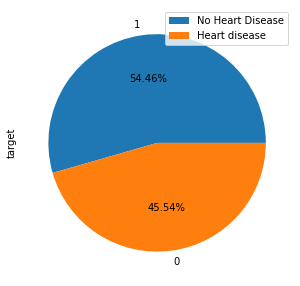

In [7]:
# Inspecting the Dataset
# The pie plot is for getting an overview of total number of heart disease/no heart disease patients
# The autopct set at 2 decimal to get a precise idea of the segregation of target values.
plot = data_df.target.value_counts().plot.pie(y='Heart Disease', figsize=(5, 5), autopct='%.2f%%').legend(['No Heart Disease', 'Heart disease'], loc="best")

As we can see, the dataset is not skewed/biased to one kind of patient.

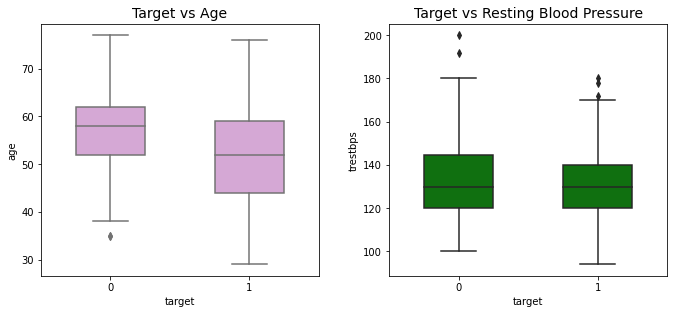

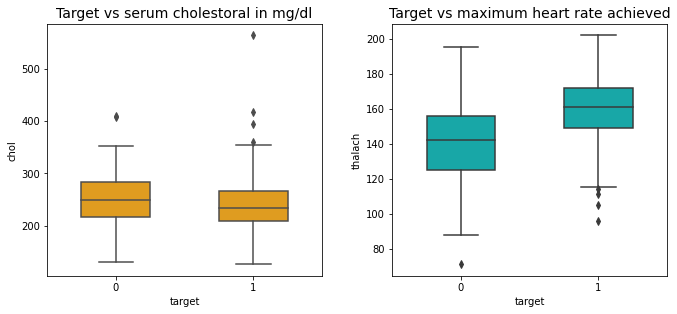

In [8]:
# palette= ['plum','g','orange','b','r']
# sns.boxplot(df['p1_satisfaction'], color="plum", width=.5) 

fig, axs = plt.subplots(ncols=2, figsize=(10,5))

sns.boxplot(x='target', y='age', data=data_df, color="plum", width=.5, ax=axs[0]).set_title('Target vs Age', fontsize=14)

sns.boxplot(x='target', y='trestbps', data=data_df, color="g", width=.5, ax=axs[1]).set_title('Target vs Resting Blood Pressure', fontsize=14)

fig.tight_layout(pad=3.0)

fig, axs = plt.subplots(ncols=2, figsize=(10,5))

sns.boxplot(x='target', y='chol', data=data_df, color="orange", width=.5, ax=axs[0]).set_title('Target vs serum cholestoral in mg/dl', fontsize=14)

sns.boxplot(x='target', y='thalach', data=data_df, color="c", width=.5, ax=axs[1]).set_title('Target vs maximum heart rate achieved', fontsize=14)

fig.tight_layout(pad=3.0)


In the above boxplots per target value(0 or 1), the outliers are decided based on how far the datapoint is from the mean.
Say in the thalach boxplot, the farthest point is the one where target is 0 and tlach value is below the lower quartile range.

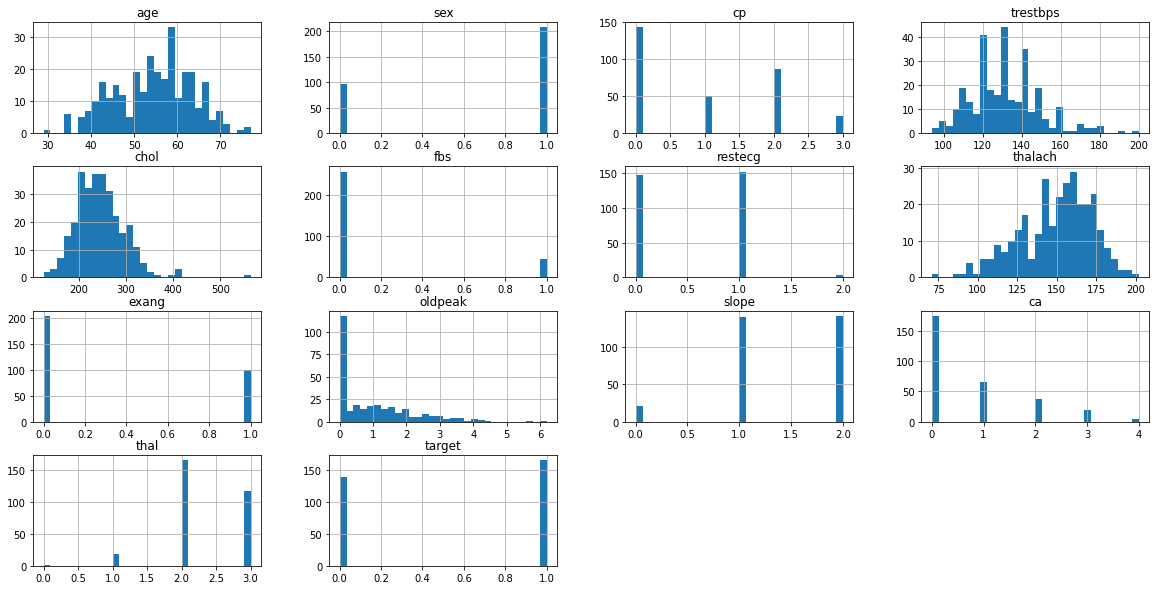

In [9]:
data_df.hist(bins=30, figsize=(20,10))
plt.show()

#### 3.2 Multivariate Plots
Now we can look at the interactions between the variables.

- First, let’s look at scatterplots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

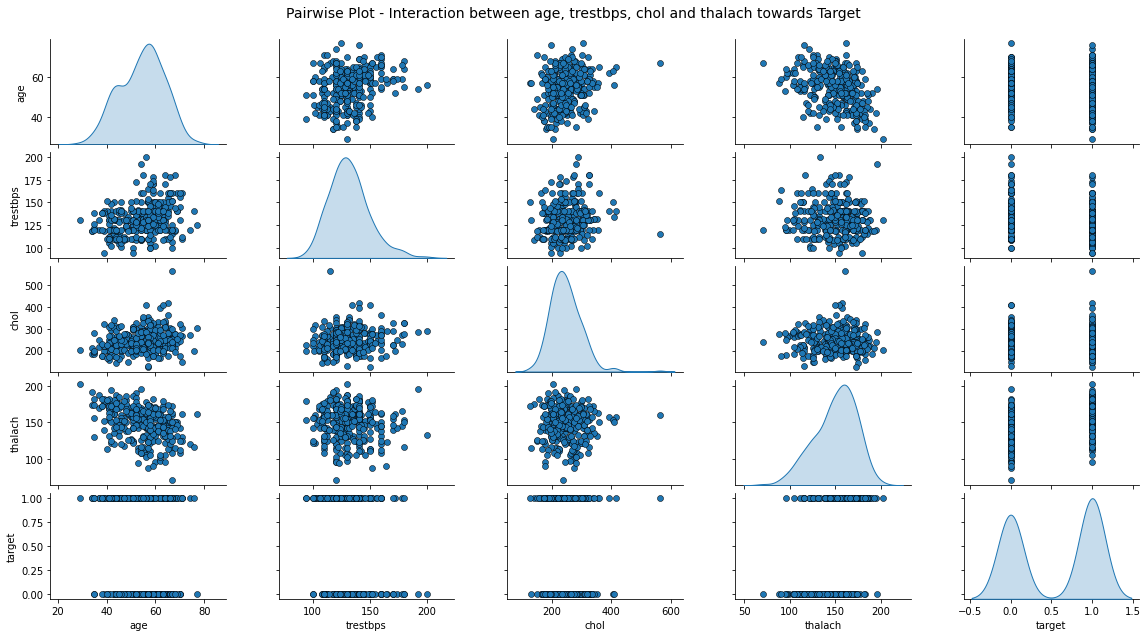

In [10]:
cols = ['age', 'trestbps', 'chol', 'thalach', 'target']
pp = sns.pairplot(data_df[cols], height=1.8, aspect=1.8,
                  plot_kws={'edgecolor':"k", 'linewidth':0.5},
                  diag_kind="kde", diag_kws={'shade':True})
   
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Pairwise Plot - Interaction between age, trestbps, chol and thalach towards Target', fontsize=14)

#### Observations

- We can see for the larger age the target is 0 -> no disease despite having appropriate chol, thalach, trestbps in extreme ranges 
- Between trestbps and target, there are outliers with respect to lower trestbps and having heart disease / higher trestbps and having No heart disease
- For chol and thalach there are outliers with respect to target

### 4. Data Cleaning & Dimentionality Reduction

1.   Percent missing values - ✅ Using this in notebook
2.   Amount of Variation - ✅ Using this in notebook
3.   Pairwise Correlation - ✅ Using this in notebook
4.   Outlier Detection and Removal - ✅ Using this in notebook

#### 4.1 Missing Values Analysis

As we can see there are no missing values in the dataset, nevertheless we can look at possible techniques to handle the same.

In [11]:
# Check % of missing values
percent_missing = data_df.isnull().sum() * 100 / len(data_df)
missing_value_df = pd.DataFrame({'percent_missing(%)': percent_missing})
missing_value_df

,percent_missing(%)
age,0.0
sex,0.0
cp,0.0
trestbps,0.0
chol,0.0
fbs,0.0
restecg,0.0
thalach,0.0
exang,0.0
oldpeak,0.0


### 📍 No missing data model stats

Lets look at the model metrics for given dataset having no missing values.

In [18]:
data_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [19]:
df_no_missing = data_df.copy()
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = df_no_missing[cols]
y = df_no_missing['target']

In [24]:
logisticRegressionModelStats(X,y)

----- Model Accuracy -----
Accuracy of logistic regression classifier on test set: 0.84
----- Confusion Matrix -----
[[33 11]
 [ 4 43]]
Number of correct predictions : 44
Number of Incorrect predictions : 47
----- Classification Report -----
              precision    recall  f1-score   support

           0       0.89      0.75      0.81        44
           1       0.80      0.91      0.85        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91

----- ROC AUC Score -----
0.8324468085106383


/home/zutshi.k/.conda/envs/pytorch_kz_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Let add some missing values to the dataset, say 10% of data is missing

In [13]:
df_cols = ['age', 'chol', 'trestbps', 'thalach']
df_missing = data_df.copy()
for col in df_cols:
    df_missing.loc[df_missing.sample(frac=0.1).index, col] = np.nan

In [14]:
# Lets check % missing data again
percent_missing = df_missing.isnull().sum() * 100 / len(df_missing)
missing_value_df1 = pd.DataFrame({'percent_missing(%)': percent_missing})
missing_value_df1

,percent_missing(%)
age,9.90099
sex,0.00000
cp,0.00000
trestbps,9.90099
chol,9.90099
fbs,0.00000
restecg,0.00000
thalach,9.90099
exang,0.00000
oldpeak,0.00000


In [15]:
df_missing.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
179,57.0,1,0,150.0,276.0,0,0,NaN,1,0.6,1,1,1,0
259,38.0,1,3,120.0,231.0,0,1,NaN,1,3.8,1,0,3,0
267,49.0,1,2,118.0,149.0,0,0,126.0,0,0.8,2,3,2,0
5,57.0,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,1
3,56.0,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1


#### Imputing missing values - Techniques

#### 1. Imputation using mean/median values

   This works by calculating the mean/median of the non-missing values in a column and then replacing the missing values within each column separately and independently from the others. **It can only be used with numeric data**.


In [29]:
#Impute the values using scikit-learn SimpleImpute Class
from sklearn.impute import SimpleImputer
df_missing_impute_mean = df_missing.copy()
imp_mean = SimpleImputer( strategy='mean') #for median imputation replace 'mean' with 'median'
imp_mean.fit(df_missing_impute_mean)
imputed_data_df = pd.DataFrame(imp_mean.transform(df_missing_impute_mean))

In [31]:
imputed_data_df.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
129,74.0,0.0,1.0,132.032967,269.000000,0.0,0.0,121.000000,1.0,0.2,2.0,1.0,2.0,1.0
38,65.0,0.0,2.0,155.000000,269.000000,0.0,1.0,149.194139,0.0,0.8,2.0,0.0,2.0,1.0
255,45.0,1.0,0.0,142.000000,245.468864,0.0,0.0,147.000000,1.0,0.0,1.0,3.0,3.0,0.0
155,58.0,0.0,0.0,130.000000,197.000000,0.0,1.0,131.000000,0.0,0.6,1.0,0.0,2.0,1.0
127,67.0,0.0,2.0,152.000000,277.000000,0.0,1.0,172.000000,0.0,0.0,2.0,1.0,2.0,1.0


### 📍 Mean Imputation model metrics

In [33]:
X = imputed_data_df.iloc[:,:-1]
y = imputed_data_df.iloc[: , -1]
logisticRegressionModelStats(X,y)

----- Model Accuracy -----
Accuracy of logistic regression classifier on test set: 0.81
----- Confusion Matrix -----
[[33 11]
 [ 6 41]]
Number of correct predictions : 44
Number of Incorrect predictions : 47
----- Classification Report -----
              precision    recall  f1-score   support

         0.0       0.85      0.75      0.80        44
         1.0       0.79      0.87      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91

----- ROC AUC Score -----
0.8111702127659575


/home/zutshi.k/.conda/envs/pytorch_kz_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#### 2. Imputation using Most frequent or Zero/Constant values

   Most Frequent is another statistical strategy to impute missing values and It **works with categorical features** (strings or numerical representations) by replacing missing data with the most frequent values within each column.

In [34]:
#Impute the values using scikit-learn SimpleImpute Class

from sklearn.impute import SimpleImputer
df_impute_most_freq = df_missing.copy()
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(df_impute_most_freq)
imputed_mostFreq_df = pd.DataFrame(imp_mean.transform(df_impute_most_freq))

### 📍 Most Frequent Imputation model metrics

In [35]:
X = imputed_mostFreq_df.iloc[:,:-1]
y = imputed_mostFreq_df.iloc[: , -1]
logisticRegressionModelStats(X,y)

----- Model Accuracy -----
Accuracy of logistic regression classifier on test set: 0.82
----- Confusion Matrix -----
[[33 11]
 [ 5 42]]
Number of correct predictions : 44
Number of Incorrect predictions : 47
----- Classification Report -----
              precision    recall  f1-score   support

         0.0       0.87      0.75      0.80        44
         1.0       0.79      0.89      0.84        47

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

----- ROC AUC Score -----
0.8218085106382979


/home/zutshi.k/.conda/envs/pytorch_kz_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#### 3. Imputation using K-NN (K nearest neighbours)
   
   
  The k nearest neighbours is an algorithm that is used for simple classification. The algorithm uses **‘feature similarity’** to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set. This can be very useful in making predictions about the missing values by **finding the k’s closest neighbours to the observation with missing data and then imputing them based on the non-missing values in the neighbourhood**. Using Impyute library which provides a simple and easy way to use KNN for imputation we can perform the operation on missing values.
  
  Pros - 
  
    1. Can be much more accurate than the mean, median or most frequent imputation methods (depending on the dataset)
  
  Cons - 
  
    1. Computationally expensive. KNN works by storing the whole training dataset in memory.
    2. K-NN is quite sensitive to outliers in the data (unlike SVM)

In [58]:
from impyute.imputation.cs import fast_knn

df_impute_KNN = df_missing.copy()
# start the KNN training
imputed_df_knn = pd.DataFrame(fast_knn(df_impute_KNN.values, k=20))

### 📍 KNN Imputation model metrics

In [59]:

X = imputed_df_knn.iloc[:,:-1]
y = imputed_df_knn.iloc[: , -1]
logisticRegressionModelStats(X,y)

----- Model Accuracy -----
Accuracy of logistic regression classifier on test set: 0.82
----- Confusion Matrix -----
[[33 11]
 [ 5 42]]
Number of correct predictions : 44
Number of Incorrect predictions : 47
----- Classification Report -----
              precision    recall  f1-score   support

         0.0       0.87      0.75      0.80        44
         1.0       0.79      0.89      0.84        47

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

----- ROC AUC Score -----
0.8218085106382979


/home/zutshi.k/.conda/envs/pytorch_kz_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#### 4. Imputation Using Multivariate Imputation by Chained Equation (MICE)

This type of imputation works by filling the missing data multiple times. Multiple Imputations (MIs) are much better than a single imputation as it measures the uncertainty of the missing values in a better way. 

The chained equations approach is also very flexible and **can handle different variables of different data types (ie., continuous or binary) as well as complexities such as bounds or survey skip patterns.**

[Reference paper - MICE](https://www.jstatsoft.org/article/view/v045i03/v45i03.pdf)

In [62]:
from impyute.imputation.cs import mice

df_impute_mice = df_missing.copy()
# start the MICE training
imputed_df_mice=pd.DataFrame(mice(df_impute_mice.values))

### 📍 MICE Imputation model metrics

In [66]:

X = imputed_df_mice.iloc[:,:-1]
y = imputed_df_mice.iloc[: , -1]
logisticRegressionModelStats(X,y)


----- Model Accuracy -----
Accuracy of logistic regression classifier on test set: 0.82
----- Confusion Matrix -----
[[33 11]
 [ 5 42]]
Number of correct predictions : 44
Number of Incorrect predictions : 47
----- Classification Report -----
              precision    recall  f1-score   support

         0.0       0.87      0.75      0.80        44
         1.0       0.79      0.89      0.84        47

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

----- ROC AUC Score -----
0.8218085106382979


/home/zutshi.k/.conda/envs/pytorch_kz_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#### 5. Imputation using Deep Learning - Datawig

   This method **works very well with categorical and non-numerical features**. It is a library that learns Machine Learning models using Deep Neural Networks to impute missing values in a dataframe. It also supports both CPU and GPU for training.
   
   Pros:

    Quite accurate compared to other methods.
    It has some functions that can handle categorical data (Feature Encoder).
    It supports CPUs and GPUs.

Cons:

    Single Column imputation.
    Can be quite slow with large datasets.
    You have to specify the columns that contain information about the target column that will be imputed.

In [249]:
import datawig

data_df5 = data_df.copy()
df_train, df_test = datawig.utils.random_split(data_df5)

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['1','2','3','4','5','6','7', 'target'], # column(s) containing information about the column we want to impute
    output_column= '0', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df_train, num_epochs=50)

#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(df_test)

### 📝 Missing values Imputation methods Inference

- Given the small dataset size, the Simpleimputer method of mean/median or most frequent gave best ROC AUC score.
- For larger datasets MICE technique/KNN can be promising
- Datawig method is very powerful but we can only pass 1 coloumn to impute at a time.

In [263]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.5f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.5f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

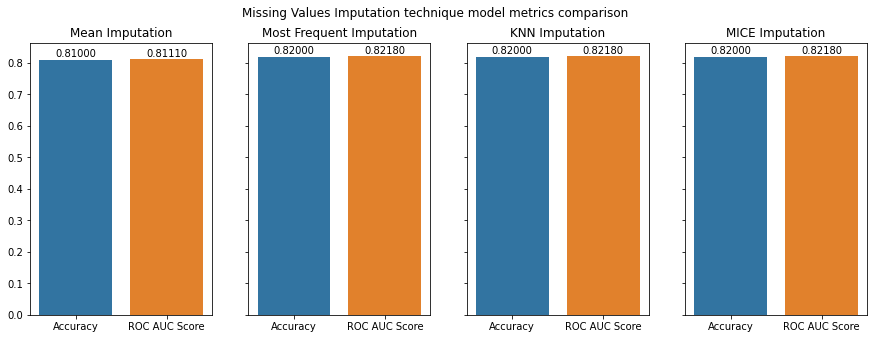

In [269]:
meanMetrics = {'Accuracy': '0.81000', 'ROC AUC Score': '0.81117'}
mostfreqMetrics = {'Accuracy': '0.82000', 'ROC AUC Score': '0.82180'}
knnMetrics = {'Accuracy': '0.82000', 'ROC AUC Score': '0.82180'}
miceMetrics = {'Accuracy': '0.82000', 'ROC AUC Score': '0.82180'}
# Metrics - accuracy and AUR ROC curve value
# 4 methods

# sns.barplot(x=keys, y=vals)

fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
fig.suptitle('Missing Values Imputation technique model metrics comparison')
print('\n')
# mean imputation
keys1 = list(meanMetrics.keys())
# get values in the same order as keys, and parse percentage values
vals1 = [float(meanMetrics[k][:-1]) for k in keys1]
g = sns.barplot(ax=axes[0], x=keys1, y=vals1)
show_values(g)
axes[0].set_title('Mean Imputation')

# most freq
keys2 = list(mostfreqMetrics.keys())
# get values in the same order as keys, and parse percentage values
vals2 = [float(mostfreqMetrics[k][:-1]) for k in keys2]
h = sns.barplot(ax=axes[1], x=keys2, y=vals2)
show_values(h)
axes[1].set_title('Most Frequent Imputation')

# KNN
keys3 = list(knnMetrics.keys())
# get values in the same order as keys, and parse percentage values
vals3 = [float(knnMetrics[k][:-1]) for k in keys3]
i = sns.barplot(ax=axes[2], x=keys3, y=vals3)
show_values(i)
axes[2].set_title('KNN Imputation')

# MICE
keys4 = list(miceMetrics.keys())
# get values in the same order as keys, and parse percentage values
vals4 = [float(miceMetrics[k][:-1]) for k in keys4]
j = sns.barplot(ax=axes[3], x=keys4, y=vals4)
show_values(j)
axes[3].set_title('MICE Imputation')

plt.show()


#### 4.2 Amount of Variation

The variance is a measure of variability. It is calculated by taking the average of squared deviations from the mean. Variance tells us the degree of spread in the data set. The more spread the data, the larger the variance is in relation to the mean.

This intepretation is more meaningful towards non-categorical columns.

In [68]:
data_df.var()

age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64

#### 4.3 Pairwise Correlation

Pearson’s correlation coefficient — commonly denoted as r. This coefficient can be used to quantify the linear relationship between two distributions (or features) in a single metric

```
0.7 <= |r| < 1.0  Strong Correlation

0.3 <= |r| < 0.7  Moderate Correlation

0.0 <= |r| < 0.3  Weak Correlation

```

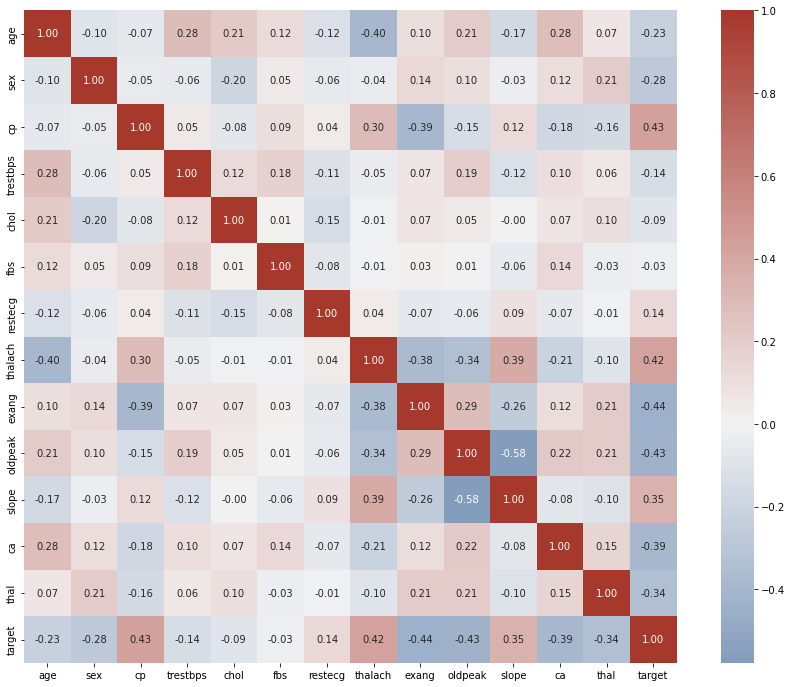

In [69]:
plt.figure(figsize=(16,12))
matrix = data_df.corr()
# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

_ = sns.heatmap(matrix, center=0, annot=True, 
                fmt='.2f', square=True, cmap=cmap)

As we can see, fbs has almost no correlation with any of the independent variables, thus suggesting its removal in feature selection.

#### 4.4 Outlier Detection and Removal

From the EDA done previously using seaborn boxplots we could see the presence of outliers in the following independent variables - 

1. chol
2. trestbps
3. thalach

Methods to detect and remove outliers - 

- Standard Deviation Method
- Interquartile Range Method

[youtube reference - Outlier removal basics](https://www.youtube.com/watch?v=Vc4cXIAa69Y)

#### Standard Deviation Method

In [129]:
# Standard deviation method



from numpy import mean
from numpy import std

def outlierDetection_SDM(df, feature):
   
    
    # calculate summary statistics
    df_feature_mean, df_feature_std = mean(df[feature]), std(df[feature])
    print(df_feature_mean, df_feature_std)
    # identify outliers
    cut_off = df_feature_std * 3
    lower, upper = df_feature_mean - cut_off, df_feature_mean + cut_off
    print(lower, upper)
    # Return a list of index of outliers 
    ls = df.index[(df[feature] < lower) | (df[feature] > upper)]
    
    return ls
#     outliers = [x for x in data if x < lower or x > upper]
#     print('Identified outliers: %d' % len(outliers))
#     print('Outlier Values', outliers)
#     data = [x for x in data if x >= lower and x <= upper]
#     return data

In [130]:
df_no_missing_SDM = df_no_missing.copy()

In [133]:
df_no_missing_SDM.shape

(303, 14)

In [131]:
# create an empty list to store the output indices from multiple rows
index_list = []

for feature in ['chol', 'trestbps', 'thalach']:
    index_list.extend(outlierDetection_SDM(df_no_missing_SDM, feature))

246.26402640264027 51.74515101045713
91.02857337126889 401.4994794340116
131.62376237623764 17.509178065734393
79.09622817903445 184.15129657344082
149.64686468646866 22.86733258188924
81.04486694080094 218.24886243213638


In [132]:
index_list

[28, 85, 220, 246, 223, 248, 272]

In [134]:
# define a function remove which returns a cleaned dataframe without outliers
def removeOutliersSDM(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [135]:
df_SDM_removedOutliers = removeOutliersSDM(df_no_missing_SDM, index_list)

**As we can see the shape of the dataset has changed, removing the rows, it drops from 303 to 296 -> removed 7 outliers**

In [136]:
df_SDM_removedOutliers.shape

(296, 14)

### 📍 SD Outlier removal model metrics

In [246]:
X = df_SDM_removedOutliers.iloc[:,:-1]
y = df_SDM_removedOutliers.iloc[: , -1]
logisticRegressionModelStats(X,y)

----- Model Accuracy -----
Accuracy of logistic regression classifier on test set: 0.84
----- Confusion Matrix -----
[[34 10]
 [ 4 41]]
Number of correct predictions : 44
Number of Incorrect predictions : 45
----- Classification Report -----
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        44
           1       0.80      0.91      0.85        45

    accuracy                           0.84        89
   macro avg       0.85      0.84      0.84        89
weighted avg       0.85      0.84      0.84        89

----- ROC AUC Score -----
0.841919191919192


/home/zutshi.k/.conda/envs/pytorch_kz_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#### Inter Quartile Range Method

The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile. 

The common value for the factor k is the value 1.5. A factor k of 3 or more can be used to identify values that are extreme outliers or “far outs” when described in the context of box and whisker plots.

In [238]:
# InterQuartile Range Method

from numpy import percentile

def outlierDetection_IQR(data, feature):
    
    # calculate interquartile range
    q25, q75 = percentile(data[feature], 25), percentile(data[feature], 75)
    iqr = q75 - q25
    print('Percentiles: 25th = %.3f, 75th = %.3f, IQR = %.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    
    ls = data.index[(data[feature] < lower) | (data[feature] > upper)]
#     for x in data[feature]:
#         if x < lower or x > upper:
#             ls = data.index[data[feature][x]]
    return ls

#     # identify outliers
#     outliers = [x for x in data if x < lower or x > upper]
#     print('Identified outliers: %d' % len(outliers))
#     print('Outlier Values', outliers)

In [239]:
df_no_missing_IQR = df_no_missing.copy()

In [240]:
df_no_missing_IQR.shape

(303, 14)

In [241]:
# create an empty list to store the output indices from multiple rows
index_listIQR = []

for feature in ['chol', 'trestbps', 'thalach']:
    index_listIQR.extend(outlierDetection_IQR(df_no_missing_IQR, feature))

Percentiles: 25th = 211.000, 75th = 274.500, IQR = 63.500
Percentiles: 25th = 120.000, 75th = 140.000, IQR = 20.000
Percentiles: 25th = 133.500, 75th = 166.000, IQR = 32.500


In [242]:
index_listIQR

[28, 85, 96, 220, 246, 8, 101, 110, 203, 223, 241, 248, 260, 266, 272]

In [243]:
# define a function remove which returns a cleaned dataframe without outliers
def removeOutliersIQR(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [244]:
df_IQR_removedOutliers = removeOutliersIQR(df_no_missing_IQR, index_listIQR)

In [245]:
df_IQR_removedOutliers.shape

(288, 14)

**As we can see the IQR method removed 15 rows from the dataset.**

### 📍 IQR method outlier removal model metrics

In [247]:
X = df_IQR_removedOutliers.iloc[:,:-1]
y = df_IQR_removedOutliers.iloc[: , -1]
logisticRegressionModelStats(X,y)

----- Model Accuracy -----
Accuracy of logistic regression classifier on test set: 0.83
----- Confusion Matrix -----
[[31 14]
 [ 1 41]]
Number of correct predictions : 45
Number of Incorrect predictions : 42
----- Classification Report -----
              precision    recall  f1-score   support

           0       0.97      0.69      0.81        45
           1       0.75      0.98      0.85        42

    accuracy                           0.83        87
   macro avg       0.86      0.83      0.83        87
weighted avg       0.86      0.83      0.82        87

----- ROC AUC Score -----
0.8325396825396825


/home/zutshi.k/.conda/envs/pytorch_kz_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### 📝 Outlier removal methods Inference

- The AUC score was better with Standard deviation method of removing outliers from dataset. Given the small dataset, SD did well. Although, for large datasets IQR method can give better results


Text(0.5, 1.0, 'Inter Quartile Range method')

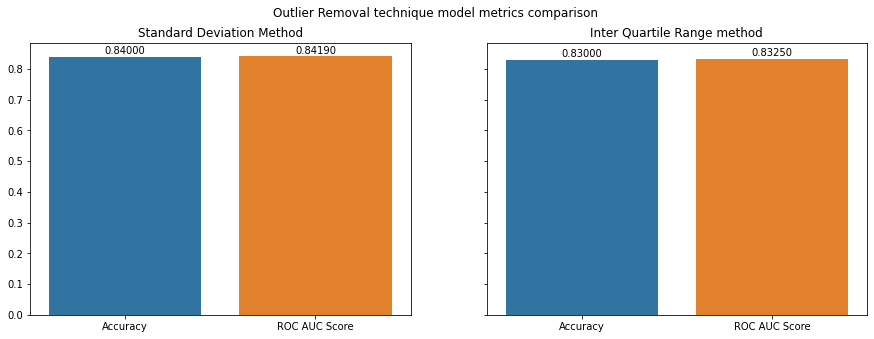

In [270]:
SDOutlierRemovalMetrics = {'Accuracy': '0.84000', 'ROC AUC Score': '0.84191'}
IQRMetrics = {'Accuracy': '0.83000', 'ROC AUC Score': '0.83253'}





fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Outlier Removal technique model metrics comparison')

# mean imputation
keys1 = list(SDOutlierRemovalMetrics.keys())
# get values in the same order as keys, and parse percentage values
vals1 = [float(SDOutlierRemovalMetrics[k][:-1]) for k in keys1]
g = sns.barplot(ax=axes[0], x=keys1, y=vals1)
show_values(g)
axes[0].set_title('Standard Deviation Method')

# most freq
keys2 = list(IQRMetrics.keys())
# get values in the same order as keys, and parse percentage values
vals2 = [float(IQRMetrics[k][:-1]) for k in keys2]
h = sns.barplot(ax=axes[1], x=keys2, y=vals2)
show_values(h)
axes[1].set_title('Inter Quartile Range method')


### 5. Data Modeling and metrics calculation function

Here the model method and corresponding function definitions for model metrics are declared. These will help us understand if the data cleaning really helped in improving performance or not

In [23]:
def logisticRegressionModelStats(X,y):
    
    from sklearn.linear_model import LogisticRegression
    from sklearn import metrics
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    y_pred = logreg.predict(X_test)
    print('----- Model Accuracy -----')
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
    print('=====================================================================================================')
    # Confusion Matrix
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(y_test, y_pred)
    print('----- Confusion Matrix -----')
    print(confusion_matrix)
    print('Number of correct predictions : {}'.format(confusion_matrix[0][0]+confusion_matrix[0][1]))
    print('Number of Incorrect predictions : {}'.format(confusion_matrix[1][0]+confusion_matrix[1][1]))
    print('=====================================================================================================')
    # Classification Report
    from sklearn.metrics import classification_report
    print('----- Classification Report -----')
    print(classification_report(y_test, y_pred))
    print('=====================================================================================================')
    # ROC AUC score
    from sklearn.metrics import roc_auc_score
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    print('----- ROC AUC Score -----')
    print(logit_roc_auc)